In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# Perceptrons

In [3]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron(random_state = 42)
per_clf.fit(X, y)

/Users/lipenghua/anaconda2/envs/ml/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=True,
      max_iter=None, n_iter=None, n_jobs=1, penalty=None, random_state=42,
      shuffle=True, tol=None, verbose=0, warm_start=False)

/Users/lipenghua/anaconda2/envs/ml/lib/python3.5/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


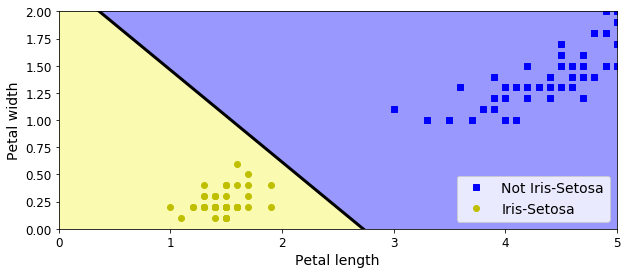

In [4]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap, linewidth=5)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

# save_fig("perceptron_iris_plot")
plt.show()

In [8]:
def logit(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps = 0.000001):
    return (f(z + eps) - f(z - eps)) / (2 * eps)

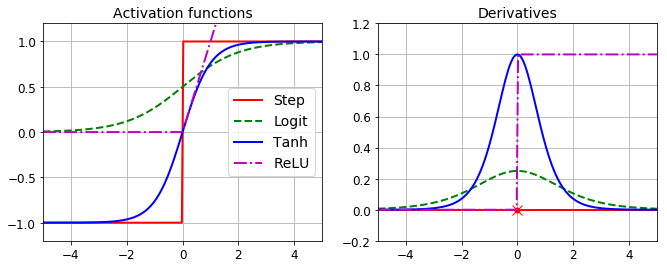

In [9]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=2, label="Step")
plt.plot(z, logit(z), "g--", linewidth=2, label="Logit")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=2, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(logit, z), "g--", linewidth=2, label="Logit")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

#save_fig("activation_functions_plot")
plt.show()

In [10]:
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets('/tmp/data/')

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [14]:
X_train = mnist.train.images
X_test = mnist.test.images
y_train = mnist.train.labels.astype('int')
y_test = mnist.test.labels.astype('int')

In [19]:
import tensorflow as tf

config = tf.contrib.learn.RunConfig(tf_random_seed = 42)

feature_cols = tf.contrib.learn.infer_real_valued_columns_from_input(X_train)
dnn_clf = tf.contrib.learn.DNNClassifier(hidden_units = [300, 100], n_classes = 10, feature_columns = feature_cols, config = config)

#dnn_clf = tf.contrib.learn.SKCompat(dnn_clf)
dnn_clf.fit(X_train, y_train, batch_size = 50, steps = 40000)

INFO:tensorflow:Using config: {'_environment': 'local', '_keep_checkpoint_max': 5, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_num_worker_replicas': 0, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_model_dir': '/var/folders/g_/tvypl9l11n70vknp44s9cbdw0000gn/T/tmpv20o_9q3', '_is_chief': True, '_tf_random_seed': 42, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x12ebf80b8>, '_num_ps_replicas': 0, '_session_config': None, '_task_id': 0, '_keep_checkpoint_every_n_hours': 10000, '_evaluation_master': '', '_task_type': None, '_save_checkpoints_steps': None, '_master': '', '_save_summary_steps': 100}
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for u

INFO:tensorflow:step = 5801, loss = 0.00796184 (0.203 sec)
INFO:tensorflow:global_step/sec: 404.598
INFO:tensorflow:step = 5901, loss = 0.0571235 (0.247 sec)
INFO:tensorflow:global_step/sec: 431.867
INFO:tensorflow:step = 6001, loss = 0.109727 (0.231 sec)
INFO:tensorflow:global_step/sec: 407.559
INFO:tensorflow:step = 6101, loss = 0.0289183 (0.247 sec)
INFO:tensorflow:global_step/sec: 472.115
INFO:tensorflow:step = 6201, loss = 0.0145181 (0.211 sec)
INFO:tensorflow:global_step/sec: 495.579
INFO:tensorflow:step = 6301, loss = 0.069224 (0.202 sec)
INFO:tensorflow:global_step/sec: 501.701
INFO:tensorflow:step = 6401, loss = 0.0269265 (0.200 sec)
INFO:tensorflow:global_step/sec: 430.739
INFO:tensorflow:step = 6501, loss = 0.0239517 (0.231 sec)
INFO:tensorflow:global_step/sec: 462.89
INFO:tensorflow:step = 6601, loss = 0.00913779 (0.219 sec)
INFO:tensorflow:global_step/sec: 446.916
INFO:tensorflow:step = 6701, loss = 0.0250074 (0.221 sec)
INFO:tensorflow:global_step/sec: 431.565
INFO:tensor

INFO:tensorflow:global_step/sec: 486.526
INFO:tensorflow:step = 14101, loss = 0.00644957 (0.206 sec)
INFO:tensorflow:global_step/sec: 511.734
INFO:tensorflow:step = 14201, loss = 0.00459348 (0.195 sec)
INFO:tensorflow:global_step/sec: 511.323
INFO:tensorflow:step = 14301, loss = 0.000862539 (0.197 sec)
INFO:tensorflow:global_step/sec: 516.764
INFO:tensorflow:step = 14401, loss = 0.000724927 (0.193 sec)
INFO:tensorflow:global_step/sec: 521.61
INFO:tensorflow:step = 14501, loss = 0.000755111 (0.192 sec)
INFO:tensorflow:global_step/sec: 519.637
INFO:tensorflow:step = 14601, loss = 0.00507716 (0.193 sec)
INFO:tensorflow:global_step/sec: 514.459
INFO:tensorflow:step = 14701, loss = 0.00104147 (0.194 sec)
INFO:tensorflow:global_step/sec: 510.657
INFO:tensorflow:step = 14801, loss = 0.000927252 (0.196 sec)
INFO:tensorflow:global_step/sec: 499.092
INFO:tensorflow:step = 14901, loss = 0.0023467 (0.200 sec)
INFO:tensorflow:global_step/sec: 508.303
INFO:tensorflow:step = 15001, loss = 0.00055444 

INFO:tensorflow:step = 22201, loss = 0.00122346 (0.211 sec)
INFO:tensorflow:global_step/sec: 510.139
INFO:tensorflow:step = 22301, loss = 0.00160932 (0.196 sec)
INFO:tensorflow:global_step/sec: 513.234
INFO:tensorflow:step = 22401, loss = 0.00156104 (0.195 sec)
INFO:tensorflow:global_step/sec: 512.529
INFO:tensorflow:step = 22501, loss = 0.00176833 (0.196 sec)
INFO:tensorflow:global_step/sec: 514.387
INFO:tensorflow:step = 22601, loss = 0.00266153 (0.194 sec)
INFO:tensorflow:global_step/sec: 517.649
INFO:tensorflow:step = 22701, loss = 0.000635709 (0.193 sec)
INFO:tensorflow:global_step/sec: 508.035
INFO:tensorflow:step = 22801, loss = 0.00124454 (0.196 sec)
INFO:tensorflow:global_step/sec: 511.63
INFO:tensorflow:step = 22901, loss = 0.00226782 (0.196 sec)
INFO:tensorflow:global_step/sec: 518.234
INFO:tensorflow:step = 23001, loss = 0.00094611 (0.193 sec)
INFO:tensorflow:global_step/sec: 510.598
INFO:tensorflow:step = 23101, loss = 0.00433953 (0.196 sec)
INFO:tensorflow:global_step/sec

INFO:tensorflow:step = 30301, loss = 0.000950241 (0.192 sec)
INFO:tensorflow:global_step/sec: 505.558
INFO:tensorflow:step = 30401, loss = 0.0013983 (0.197 sec)
INFO:tensorflow:global_step/sec: 514.065
INFO:tensorflow:step = 30501, loss = 0.000844794 (0.194 sec)
INFO:tensorflow:global_step/sec: 513.519
INFO:tensorflow:step = 30601, loss = 0.00117865 (0.195 sec)
INFO:tensorflow:global_step/sec: 520.481
INFO:tensorflow:step = 30701, loss = 0.000709257 (0.192 sec)
INFO:tensorflow:global_step/sec: 511.936
INFO:tensorflow:step = 30801, loss = 0.00136697 (0.195 sec)
INFO:tensorflow:global_step/sec: 510.087
INFO:tensorflow:step = 30901, loss = 0.00115121 (0.196 sec)
INFO:tensorflow:global_step/sec: 511.504
INFO:tensorflow:step = 31001, loss = 0.00142313 (0.195 sec)
INFO:tensorflow:global_step/sec: 516.169
INFO:tensorflow:step = 31101, loss = 0.00088027 (0.194 sec)
INFO:tensorflow:global_step/sec: 516.188
INFO:tensorflow:step = 31201, loss = 0.000398427 (0.193 sec)
INFO:tensorflow:global_step/

INFO:tensorflow:step = 38401, loss = 0.000193903 (0.201 sec)
INFO:tensorflow:global_step/sec: 457.915
INFO:tensorflow:step = 38501, loss = 0.000534494 (0.219 sec)
INFO:tensorflow:global_step/sec: 413.681
INFO:tensorflow:step = 38601, loss = 0.000722744 (0.242 sec)
INFO:tensorflow:global_step/sec: 367.62
INFO:tensorflow:step = 38701, loss = 0.000386308 (0.273 sec)
INFO:tensorflow:global_step/sec: 384.814
INFO:tensorflow:step = 38801, loss = 0.000195052 (0.260 sec)
INFO:tensorflow:global_step/sec: 431.081
INFO:tensorflow:step = 38901, loss = 0.00139589 (0.232 sec)
INFO:tensorflow:global_step/sec: 430.259
INFO:tensorflow:step = 39001, loss = 9.83998e-05 (0.233 sec)
INFO:tensorflow:global_step/sec: 420.119
INFO:tensorflow:step = 39101, loss = 0.000953263 (0.238 sec)
INFO:tensorflow:global_step/sec: 409.69
INFO:tensorflow:step = 39201, loss = 0.000397221 (0.244 sec)
INFO:tensorflow:global_step/sec: 419.222
INFO:tensorflow:step = 39301, loss = 0.000329621 (0.237 sec)
INFO:tensorflow:global_s

DNNClassifier(params={'head': <tensorflow.contrib.learn.python.learn.estimators.head._MultiClassHead object at 0x12ebf8588>, 'feature_columns': (_RealValuedColumn(column_name='', dimension=784, default_value=None, dtype=tf.float32, normalizer=None),), 'embedding_lr_multipliers': None, 'activation_fn': <function relu at 0x120f5c7b8>, 'input_layer_min_slice_size': None, 'dropout': None, 'optimizer': None, 'hidden_units': [300, 100], 'gradient_clip_norm': None})

In [22]:
from sklearn.metrics import accuracy_score

y_pred = dnn_clf.predict(X_test)
accuracy_score(y_test, y_pred['classes'])

INFO:tensorflow:Restoring parameters from /var/folders/g_/tvypl9l11n70vknp44s9cbdw0000gn/T/tmpv20o_9q3/model.ckpt-40000


TypeError: 'generator' object is not subscriptable

In [17]:
from sklearn.metrics import log_loss

y_pred_proba = y_pred['probabilities']
log_loss(y_test, y_pred_proba)

0.069195730964124319

In [23]:
dnn_clf.evaluate(X_test, y_test)

Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
INFO:tensorflow:Starting evaluation at 2018-04-03-07:32:48
INFO:tensorflow:Restoring parameters from /var/folders/g_/tvypl9l11n70vknp44s9cbdw0000gn/T/tmpv20o_9q3/model.ckpt-40000
INFO:tensorflow:Finished evaluation at 2018-04-03-07:32:49
INFO:tensorflow:Saving dict for global step 40000: accuracy = 0.9824, global_step = 40000, loss = 0.0691956


{'accuracy': 0.9824, 'global_step': 40000, 'loss': 0.069195643}

In [30]:
import tensorflow as tf

n_inputs = 28 * 28
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [37]:
reset_graph()

X = tf.placeholder(tf.float32, shape = (None, n_inputs), name = 'X')
y = tf.placeholder(tf.int64, shape = (None), name = 'y')

In [38]:
def neuron_layer(X, n_neurons, name, activation = None):
    with tf.name_scope(name):
        n_inputs = int(X.get_shape()[1])
        stddev = 2 / np.sqrt(n_inputs)
        init = tf.truncated_normal((n_inputs, n_neurons), stddev = stddev)
        
        W = tf.Variable(init, name = 'kernal')
        b = tf.Variable(tf.zeros([n_neurons]), name = 'bias')
        
        Z = tf.matmul(X, W) + b
        
        if activation is not None:
            return activation(Z)
        else:
            return Z

In [39]:
with tf.name_scope("dnn"):
    hidden1 = neuron_layer(X, n_hidden1, name = 'hidden1', activation = tf.nn.relu)
    hidden2 = neuron_layer(hidden1, n_hidden2, name = 'hidden2', activation = tf.nn.relu)
    logits = neuron_layer(hidden2, n_outputs, name = 'outputs')

In [40]:
with tf.name_scope('loss'):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels = y, logits = logits)
    loss = tf.reduce_mean(xentropy, name = 'loss')